In [1]:
%matplotlib inline

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
df = pd.read_csv("Dataset/adult.csv")
df = df.replace(" ",np.nan)
df

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## OUTLIERS

### Attribute Age

In [130]:
##For attribute Age, we consider persons with frequency(or count) of less than 10 for a particular age as outliers 

df_temp = df.groupby('Age')["Education"].count()
dicts = {}
for index_val, series_val in df_temp.iteritems():
    if series_val < 10:
        dicts[index_val] = series_val
print(dicts)
###You just need to remove tuples from main dataframe with age equal to key in dictionary
# for key, value in dicts.items():
#     print(key, value)







{83: 6, 85: 3, 86: 1, 87: 1, 88: 3}


### For Attribute Workclass 

In [140]:
df_temp = df.groupby('WorkClass')["Education"].count()
df_temp

WorkClass
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
Name: Education, dtype: int64

 ### Attribute Final Weight

Salary
 <=50K    24720
 >50K      7841
Name: Final_wt, dtype: int64

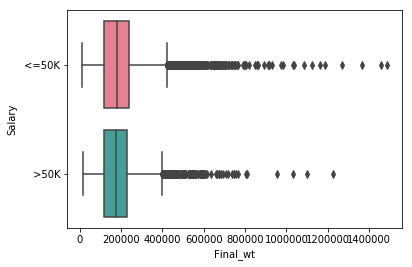

In [135]:
#Visualization

sns.boxplot(x="Final_wt",y="Salary",data=df,palette='husl')
#sns.swarmplot(x="Final_wt",y="Salary",data=df)#Showing data points along with boxplot
df_temp = df.groupby('Salary')["Final_wt"].count()
df_temp


In [136]:
#Now calculating the count for persons with final_wt value greater than 400000(whiskers end) for case of salary>50k and 
# value greater than 451000(whiskers end) for case of salary<=50k 

df_temp = df        
df_temp = df_temp[(df['Final_wt'] > 400000) & (df['Salary'] == ' >50K')]
# df_temp.count()
#Comes out be 271 out of total 7841 people with sal > 50k

df_temp = df        
df_temp = df_temp[(df['Final_wt'] > 451000) & (df['Salary'] == ' <=50K')]
df_temp.count()
#Comes out be 506 out of total 24720 people with sal <= 50k


Age               506
WorkClass         476
Final_wt          506
Education         506
Edu_num           506
Marital_stat      506
Occupation        475
Relationship      506
Race              506
Sex               506
cpt_gain          506
cpt_loss          506
Hr_per_week       506
Native_country    494
Salary            506
dtype: int64

In [137]:
#### For Attribute Final_Wt
# df.Final_wt.min()
# df.Final_wt.max()
df_temp = df.Final_wt.quantile([0.25,0.5,0.75])
IQR = df_temp[0.75]-df_temp[0.25]
print(IQR)

#Appropriately use the factor like 1.5 to remove outlier 


119224.0


###  Attribute Education 

In [138]:
df_temp = df.groupby('Education').count()
df_temp

,Age,WorkClass,Final_wt,Edu_num,Marital_stat,Occupation,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Education,,,,,,,,,,,,,,
10th,933,833,933,933,933,831,933,933,933,933,933,933,921,933
11th,1175,1057,1175,1175,1175,1056,1175,1175,1175,1175,1175,1175,1167,1175
12th,433,393,433,433,433,393,433,433,433,433,433,433,417,433
1st-4th,168,156,168,168,168,156,168,168,168,168,168,168,163,168
5th-6th,333,303,333,333,333,303,333,333,333,333,333,333,318,333
7th-8th,646,574,646,646,646,573,646,646,646,646,646,646,627,646
9th,514,463,514,514,514,463,514,514,514,514,514,514,506,514
Assoc-acdm,1067,1020,1067,1067,1067,1020,1067,1067,1067,1067,1067,1067,1055,1067
Assoc-voc,1382,1321,1382,1382,1382,1321,1382,1382,1382,1382,1382,1382,1366,1382


### Education number

In [144]:
df_temp = df.groupby('Edu_num').count()
df_temp

,Age,WorkClass,Final_wt,Education,Marital_stat,Occupation,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Edu_num,,,,,,,,,,,,,,
1,51,46,51,51,51,46,51,51,51,51,51,51,50,51
2,168,156,168,168,168,156,168,168,168,168,168,168,163,168
3,333,303,333,333,333,303,333,333,333,333,333,333,318,333
4,646,574,646,646,646,573,646,646,646,646,646,646,627,646
5,514,463,514,514,514,463,514,514,514,514,514,514,506,514
6,933,833,933,933,933,831,933,933,933,933,933,933,921,933
7,1175,1057,1175,1175,1175,1056,1175,1175,1175,1175,1175,1175,1167,1175
8,433,393,433,433,433,393,433,433,433,433,433,433,417,433
9,10501,9969,10501,10501,10501,9968,10501,10501,10501,10501,10501,10501,10368,10501


### Attribute Marital status

In [149]:
df.Marital_stat.unique()
df_temp = df.groupby('Marital_stat').count()
df_temp

,Age,WorkClass,Final_wt,Education,Edu_num,Occupation,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Marital_stat,,,,,,,,,,,,,,
Divorced,4443,4259,4443,4443,4443,4258,4443,4443,4443,4443,4443,4443,4394,4443
Married-AF-spouse,23,21,23,23,23,21,23,23,23,23,23,23,23,23
Married-civ-spouse,14976,14340,14976,14976,14976,14339,14976,14976,14976,14976,14976,14976,14692,14976
Married-spouse-absent,418,389,418,418,418,389,418,418,418,418,418,418,397,418
Never-married,10683,9917,10683,10683,10683,9912,10683,10683,10683,10683,10683,10683,10488,10683
Separated,1025,959,1025,1025,1025,959,1025,1025,1025,1025,1025,1025,1005,1025
Widowed,993,840,993,993,993,840,993,993,993,993,993,993,979,993


### Occupation

In [150]:
df.Occupation.unique()
df_temp = df.groupby('Occupation').count()
df_temp

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Relationship,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Occupation,,,,,,,,,,,,,,
Adm-clerical,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3721,3770
Armed-Forces,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Craft-repair,4099,4099,4099,4099,4099,4099,4099,4099,4099,4099,4099,4099,4030,4099
Exec-managerial,4066,4066,4066,4066,4066,4066,4066,4066,4066,4066,4066,4066,3992,4066
Farming-fishing,994,994,994,994,994,994,994,994,994,994,994,994,989,994
Handlers-cleaners,1370,1370,1370,1370,1370,1370,1370,1370,1370,1370,1370,1370,1350,1370
Machine-op-inspct,2002,2002,2002,2002,2002,2002,2002,2002,2002,2002,2002,2002,1966,2002
Other-service,3295,3295,3295,3295,3295,3295,3295,3295,3295,3295,3295,3295,3212,3295
Priv-house-serv,149,149,149,149,149,149,149,149,149,149,149,149,143,149


### Relationship

In [151]:
df.Relationship.unique()
df_temp = df.groupby('Relationship').count()
df_temp


,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Race,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Relationship,,,,,,,,,,,,,,
Husband,13193,12704,13193,13193,13193,13193,12704,13193,13193,13193,13193,13193,12947,13193
Not-in-family,8305,7866,8305,8305,8305,8305,7865,8305,8305,8305,8305,8305,8156,8305
Other-relative,981,918,981,981,981,981,918,981,981,981,981,981,952,981
Own-child,5068,4530,5068,5068,5068,5068,4525,5068,5068,5068,5068,5068,5005,5068
Unmarried,3446,3271,3446,3446,3446,3446,3271,3446,3446,3446,3446,3446,3384,3446
Wife,1568,1436,1568,1568,1568,1568,1435,1568,1568,1568,1568,1568,1534,1568


### Attribute Gender

In [152]:
df_temp = df.groupby('Sex').count()
df_temp
#Distribution is uniform so no need of outlier removal......

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Relationship,Race,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Sex,,,,,,,,,,,,,,
Female,10771,9932,10771,10771,10771,10771,9930,10771,10771,10771,10771,10771,10608,10771
Male,21790,20793,21790,21790,21790,21790,20788,21790,21790,21790,21790,21790,21370,21790


### Attribute Race

In [153]:
df_temp = df.groupby('Race').count()
df_temp

,Age,WorkClass,Final_wt,Education,Edu_num,Marital_stat,Occupation,Relationship,Sex,cpt_gain,cpt_loss,Hr_per_week,Native_country,Salary
Race,,,,,,,,,,,,,,
Amer-Indian-Eskimo,311,286,311,311,311,311,286,311,311,311,311,311,311,311
Asian-Pac-Islander,1039,974,1039,1039,1039,1039,974,1039,1039,1039,1039,1039,956,1039
Black,3124,2911,3124,3124,3124,3124,2909,3124,3124,3124,3124,3124,3028,3124
Other,271,248,271,271,271,271,248,271,271,271,271,271,253,271
White,27816,26306,27816,27816,27816,27816,26301,27816,27816,27816,27816,27816,27430,27816


## Handling missing values

We need to fill the missing values of WorkClass which depends on Age.
We are making one more DataFrame which is having age attribute converted to categorical with classes 0-20,20-40,....,80-100.
In each class the value is replced with upper class boundary. (eg. 9 to 20, 33 to 40)

In [87]:
df_temp = df
x = 0
y = 20

temp = []
while (x<=80):
    workclass = []
    for index, row in df_temp.iterrows():
        if (row["Age"] > x) and (row["Age"] <= y):
            workclass.append(row["WorkClass"])
    x = x + 20
    y = y + 20
    temp.append(st.mode(workclass))
list(temp)

df_temp["WorkClass"].fillna("Private",inplace=True)
df_temp["WorkClass"].isnull().values.any()
# Just overwrite this to main dataframe that is df


#Verify by uncommenting this
# df_temp = df_temp[(df["Age"]>0) & (df["Age"]<=20)]
# print(df_temp.count())
# st.mode(df_temp["WorkClass"])



False

Handling NaN value for Occupation attribute.Occupation is generally depend on education qualification of a person that is Education 

In [147]:
df_temp = df
Uni_edu = df["Education"].unique()


dicts = {}
grouped = df_temp.groupby('Education')
for name,group in grouped:
    mode = st.mode(group["Occupation"])
    dicts[name] = mode

print(dicts)
# Just overwrite this to main dataframe that is df


#Verify by uncommenting this
# df_temp = df_temp[(df["Age"]>0) & (df["Age"]<=20)]
# print(df_temp.count())
# st.mode(df_temp["WorkClass"])



{' 10th': ' Other-service', ' 11th': ' Other-service', ' 12th': ' Other-service', ' 1st-4th': ' Other-service', ' 5th-6th': ' Other-service', ' 7th-8th': ' Craft-repair', ' 9th': ' Other-service', ' Assoc-acdm': ' Adm-clerical', ' Assoc-voc': ' Craft-repair', ' Bachelors': ' Prof-specialty', ' Doctorate': ' Prof-specialty', ' HS-grad': ' Craft-repair', ' Masters': ' Prof-specialty', ' Preschool': ' Other-service', ' Prof-school': ' Prof-specialty', ' Some-college': ' Adm-clerical'}


Handling NaN values for Native_Country by simply droping rows with nan values for Native Country column

In [10]:
df = df.dropna(subset=["Native_country"]) 
df.count()

Age               31978
WorkClass         30169
Final_wt          31978
Education         31978
Edu_num           31978
Marital_stat      31978
Occupation        30162
Relationship      31978
Race              31978
Sex               31978
cpt_gain          31978
cpt_loss          31978
Hr_per_week       31978
Native_country    31978
Salary            31978
dtype: int64

## Reduction

Count for non-zero values for capital gain attribute.

In [18]:
df_temp1 = df
df_temp1 = df_temp1[df_temp1["cpt_gain"] > 0]
df_temp1.count()

Age               2658
WorkClass         2538
Final_wt          2658
Education         2658
Edu_num           2658
Marital_stat      2658
Occupation        2538
Relationship      2658
Race              2658
Sex               2658
cpt_gain          2658
cpt_loss          2658
Hr_per_week       2658
Native_country    2658
Salary            2658
dtype: int64

Count for non-zero values for capital loss attribute.


In [19]:
df_temp1 = df
df_temp1 = df_temp1[df_temp1["cpt_loss"] > 0]
df_temp1.count()

Age               1483
WorkClass         1427
Final_wt          1483
Education         1483
Edu_num           1483
Marital_stat      1483
Occupation        1427
Relationship      1483
Race              1483
Sex               1483
cpt_gain          1483
cpt_loss          1483
Hr_per_week       1483
Native_country    1483
Salary            1483
dtype: int64

Number of non-zero values for both the attibutes in the dataframe were very less and in UCI ML library no description for these attributes were provided,Hence we drop these attributes  

In [24]:
df.drop(['cpt_gain','cpt_loss'],axis=1)

ValueError: labels ['cpt_gain' 'cpt_loss'] not contained in axis

## Coorelation

Between Education and occupation

In [42]:
df_temp = df.groupby(['Education','Occupation'])['Age'].count()
df_temp = pd.Series.to_frame(df_temp)


Age
Education     Occupation              
 10th          Adm-clerical         38
               Craft-repair        170
               Exec-managerial      24
               Farming-fishing      44
               Handlers-cleaners    71
               Machine-op-inspct   101
               Other-service       194
               Priv-house-serv       6
               Prof-specialty        9
               Protective-serv       6
               Sales                81
               Tech-support          3
               Transport-moving     84
 11th          Adm-clerical         67
               Craft-repair        175
               Exec-managerial      34
               Farming-fishing      37
               Handlers-cleaners   123
               Machine-op-inspct    99
               Other-service       238
               Priv-house-serv      14
               Prof-specialty       20
               Protective-serv       7
               Sales               144
               Tech-support          6
               Transport-moving     92
 12th          Adm-clerical         38
               Armed-Forces          1
               Craft-repair         58
               Exec-managerial      13
...                                ...
 Preschool     Handlers-cleaners     2
               Machine-op-inspct    11
               Other-service        15
               Priv-house-serv       2
               Prof-specialty        1
 Prof-school   Adm-clerical          9
               Craft-repair          7
               Exec-managerial      52
               Farming-fishing       4
               Machine-op-inspct     1
               Other-service         4
               Prof-specialty      452
               Protective-serv       1
               Sales                18
               Tech-support          7
               Transport-moving      3
 Some-college  Adm-clerical       1281
               Armed-Forces          2
               Craft-repair        868
               Exec-managerial     879
               Farming-fishing     174
               Handlers-cleaners   267
               Machine-op-inspct   310
               Other-service       781
               Priv-house-serv      16
               Prof-specialty      430
               Protective-serv     202
               Sales              1009
               Tech-support        273
               Transport-moving    283

[201 rows x 1 columns]

## Normalization 

For numeric attribute Final_wt

In [17]:
ft_min = df.Final_wt.min()
ft_max = df.Final_wt.max()
normalized = (df["Final_wt"]-ft_min)/(ft_max - ft_min)
#normalization because the values for attributes varies alot 

1484705

For ATTRIBUTE Hr_per_week

In [26]:
hr_per_week_min = df.Hr_per_week.min()
hr_per_week_max = df.Hr_per_week.max()
#This attribute doent need to be normalized because range is less .....


1484705

For Attribute Edu_num

In [28]:
Edu_num_min = df.Hr_per_week.min()
Edu_num_max = df.Hr_per_week.max()
print(Edu_num_min,Edu_num_max)

1 99


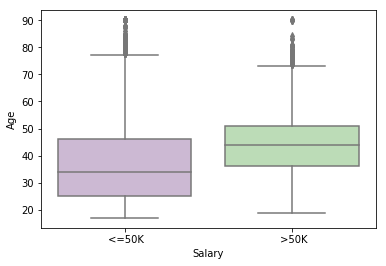

In [3]:
sns.boxplot(y="Age", x="Salary", data=df, palette="PRGn")


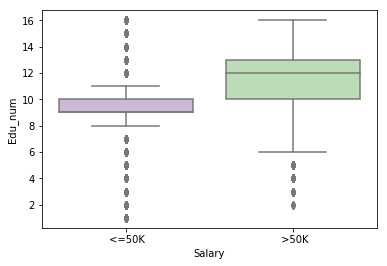

In [6]:
sns.boxplot(y="Edu_num", x="Salary", data=df, palette="PRGn")

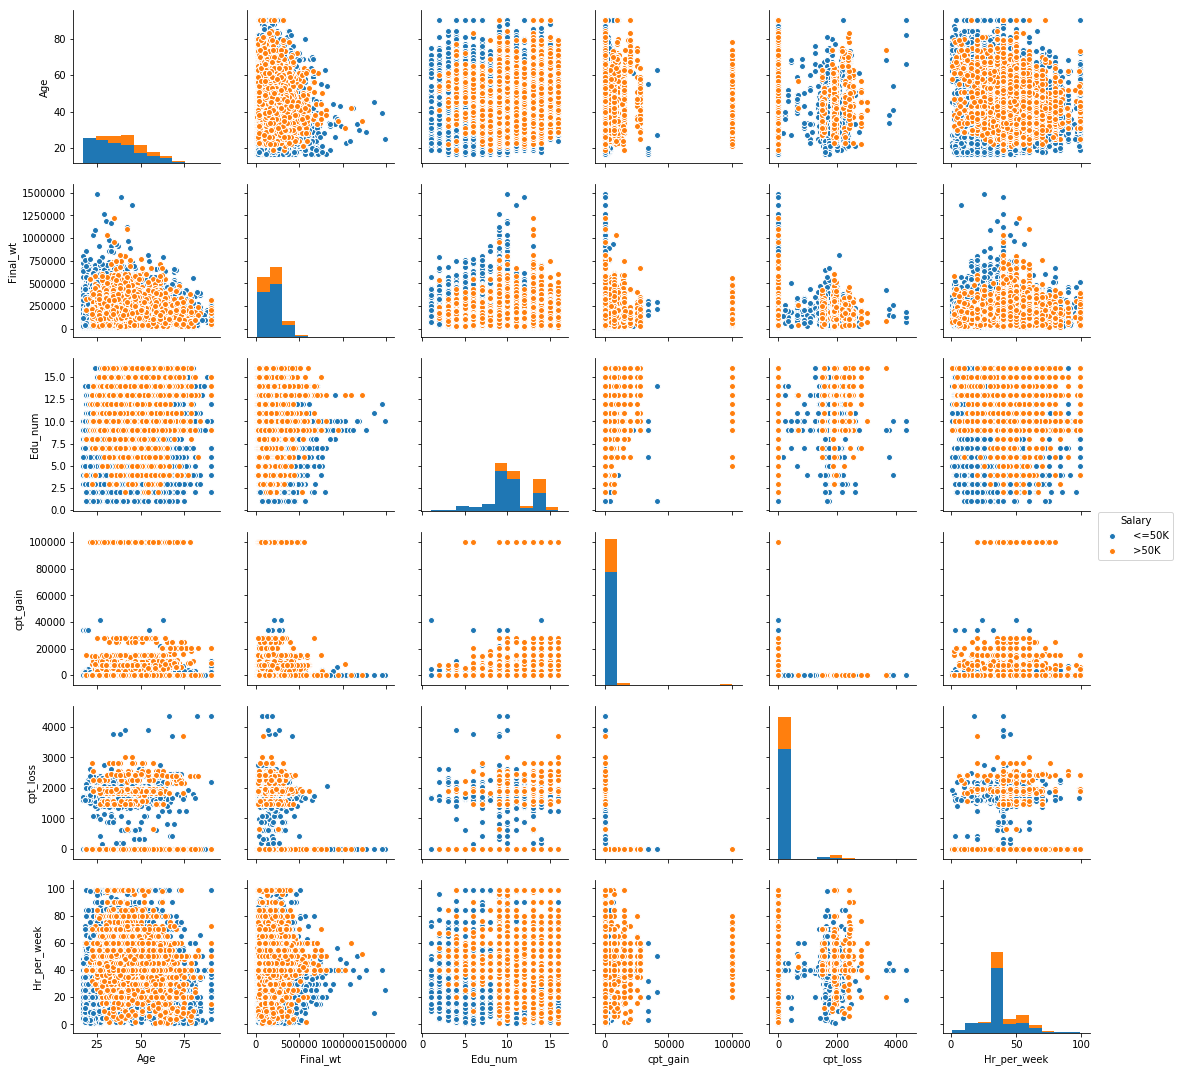

In [3]:
sns.pairplot(df, hue="Salary")

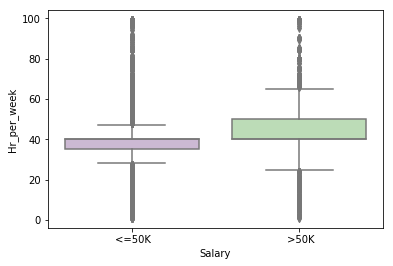

In [7]:
sns.boxplot(y="Hr_per_week", x="Salary", data=df, palette="PRGn")

In [20]:
df["WorkClass"].isnull().values

array([False, False, False, ..., False, False, False], dtype=bool)

In [27]:
st.mode(df["WorkClass"])

' Private'

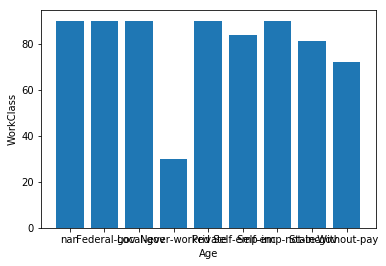

In [48]:
plt.bar(df["WorkClass"],df["Age"],label="Bar Chart")
plt.xlabel("Age")
plt.ylabel("WorkClass")
plt.show()

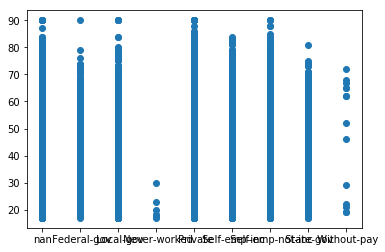

In [105]:
plt.scatter(df["WorkClass"],df["Age"])

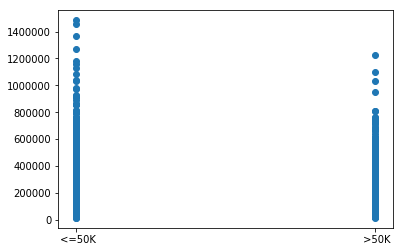

In [107]:
plt.scatter(df["Salary"],df["Final_wt"])

In [146]:
df["Education"].isnull().values.any()

False

In [112]:
df["Edu_num"].isnull().values.any()

False

In [114]:
df["Sex"].isnull().values.any()

False

In [120]:
df["Relationship"].isnull().values.any()

False

In [122]:
df["Marital_stat"].isnull().values.any()

False

In [124]:
df["Occupation"].isnull().values.any()

True

In [126]:
df["Race"].isnull().values.any()

False

In [128]:
df["cpt_gain"].isnull().values.any()

False

In [129]:
df["Native_country"].isnull().values.any()

True

In [4]:
df["Salary"].isnull().values.any()

False

In [7]:
st.mode(df["Occupation"])

' Prof-specialty'

In [12]:
df.groupby?